라이브러리 import

In [ ]:
import plotly.express as px

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


데이터 준비하기

In [ ]:
df = pd.read_csv('/content/지역별기간별 교통량 데이터.csv', encoding='utf-8')
df.info()

In [ ]:
df.tail()

,도로_시작위치,도로_종료위치,년,월,일,방향,일종_차량수,이종_차량수,삼종_차량수,사종_차량수,오종_차량수,육종_차량수,칠종_차량수,팔종_차량수,구종_차량수,십종_차량수,십일종_차량수,십이종_차량수,전체_차량수
126186,북영천IC,서포항IC,2016,3,7,1,15422,569,1658,941,377,602,311,90,11,189,3,155,20328
126187,북영천IC,서포항IC,2016,3,8,2,15972,520,2290,960,397,387,745,8,0,347,6,257,21889
126188,북영천IC,서포항IC,2016,3,11,1,8280,318,1007,560,220,363,183,54,8,109,2,94,11198
126189,북영천IC,서포항IC,2016,3,11,2,8445,270,1131,517,229,261,424,4,0,227,5,172,11685
126190,북영천IC,서포항IC,2016,3,12,1,7946,302,1013,563,229,362,193,51,8,112,2,96,10877


월 별/ 도로 별 전체 교통량 현황

In [ ]:
fig = px.scatter(df, x='월', y='전체_차량수', color='도로_시작위치')
fig.show()

In [ ]:
# 일 별 전체 교통량 표현
fig = px.scatter(df, x='일', y='전체_차량수', color='도로_시작위치')
fig.show()

도로 위치 별/월 별 전체 교통량 현황<br>
x 축에 도로 위치, y축에 전체 교통량, 월 별 정보를 표시

In [ ]:
fig = px.scatter(df, x='도로_시작위치', y='전체_차량수', color='월')
fig.show()

월 별 전체 교통량 현황

In [ ]:
fig = px.pie(df, values='전체_차량수', names='월')
fig.show()

일 별 전체 교통량 현황

In [ ]:
fig = px.pie(df, values='전체_차량수', names='일')
fig.show()

조건을 사용해서 더 자세히 분석

In [ ]:
# 영천시 도로 데이터 df1변수에 담기
df1 = df[df['도로_시작위치'] == '영천시']
print(df1.size)
df1.info()

영천시 월별 통행량 현황

In [ ]:
fig = px.bar(df1, x='전체_차량수', y='도로_시작위치',
             orientation='h',
             color='월',
             title='영천시 월 별 통행량 현황')
fig.show()

In [ ]:
# 영천시 월 별
fig = px.bar(df1, x='월', y='전체_차량수',
             title='영천시 월 별 통행량 현황')
fig.show()

In [ ]:
# 영천시 일 별
fig = px.bar(df1, x='일', y='전체_차량수',
             title='영천시 일 별 통행량 현황')
fig.show()

월 별 일종 차량 교통량 현황

In [ ]:
fig = px.bar(df1, x='월', y='일종_차량수',
             title='영천시 월 별 일종 차량 통행량 현황')
fig.show()

월 별 이종 차량 교통량 현황

In [ ]:
fig = px.bar(df1, x='월', y='이종_차량수',
             title='영천시 월 별 이종 차량 통행량 현황')
fig.show()

일 별 일종 차량 교통량 현황

In [ ]:
fig = px.bar(df1, x='일', y='일종_차량수',
             title='영천시 일 별 일종 차량 통행량 현황')
fig.show()

일 별 이종 차량 교통량 현황

In [ ]:
fig = px.bar(df1, x='일', y='이종_차량수',
             title='영천시 일 별 이종 차량 통행량 현황')
fig.show()

우리 조에서 원하는 도로의 교통량 분석하기

In [ ]:
df['도로_종료위치'].unique()

In [ ]:
df_Daecheon_7 = df[(df['도로_종료위치'] == ' 대천IC') & (df['월'] == 7)]
df_Daecheon = df[df.도로_종료위치 == ' 대천IC']
print(df_Daecheon.head(3))
df_Daecheon.head()

       도로_시작위치 도로_종료위치     년  월    일  ...  구종_차량수  십종_차량수  십일종_차량수  십이종_차량수   전체_차량수
119266  무창포IC     대천IC  2016  1  1.0  ...     0.0   142.0      1.0     64.0  11715.0
119267  무창포IC     대천IC  2016  1  2.0  ...     3.0   198.0      2.0     31.0  11971.0
119268  무창포IC     대천IC  2016  1  3.0  ...     1.0   115.0      3.0     27.0  15097.0

[3 rows x 19 columns]


,도로_시작위치,도로_종료위치,년,월,일,방향,일종_차량수,이종_차량수,삼종_차량수,사종_차량수,오종_차량수,육종_차량수,칠종_차량수,팔종_차량수,구종_차량수,십종_차량수,십일종_차량수,십이종_차량수,전체_차량수
119266,무창포IC,대천IC,2016,1,1.0,1.0,7738.0,322.0,1111.0,813.0,752.0,361.0,311.0,100.0,0.0,142.0,1.0,64.0,11715.0
119267,무창포IC,대천IC,2016,1,2.0,1.0,7630.0,254.0,1333.0,948.0,686.0,439.0,322.0,125.0,3.0,198.0,2.0,31.0,11971.0
119268,무창포IC,대천IC,2016,1,3.0,2.0,12884.0,471.0,507.0,390.0,254.0,158.0,247.0,40.0,1.0,115.0,3.0,27.0,15097.0
119269,무창포IC,대천IC,2016,1,4.0,1.0,15479.0,630.0,800.0,576.0,411.0,293.0,202.0,95.0,2.0,132.0,3.0,23.0,18646.0
119270,무창포IC,대천IC,2016,1,5.0,1.0,9409.0,362.0,193.0,158.0,122.0,64.0,55.0,15.0,0.0,30.0,0.0,3.0,10411.0


In [ ]:
fig = px.bar(df_Daecheon1, x='일', y='전체_차량수',
             title='대천IC 7월 전체 차량 통행량 현황')
fig.show()

In [ ]:
fig = px.bar(df_Daecheon1, x='일', y='일종_차량수',
             title='대천IC 7월 일종 차량 통행량 현황')
fig.show()

In [ ]:
car_type = [i for i in df.columns[6:18]]
print(car_type)
car_total = [df[j].sum() for j in car_type]
car_total

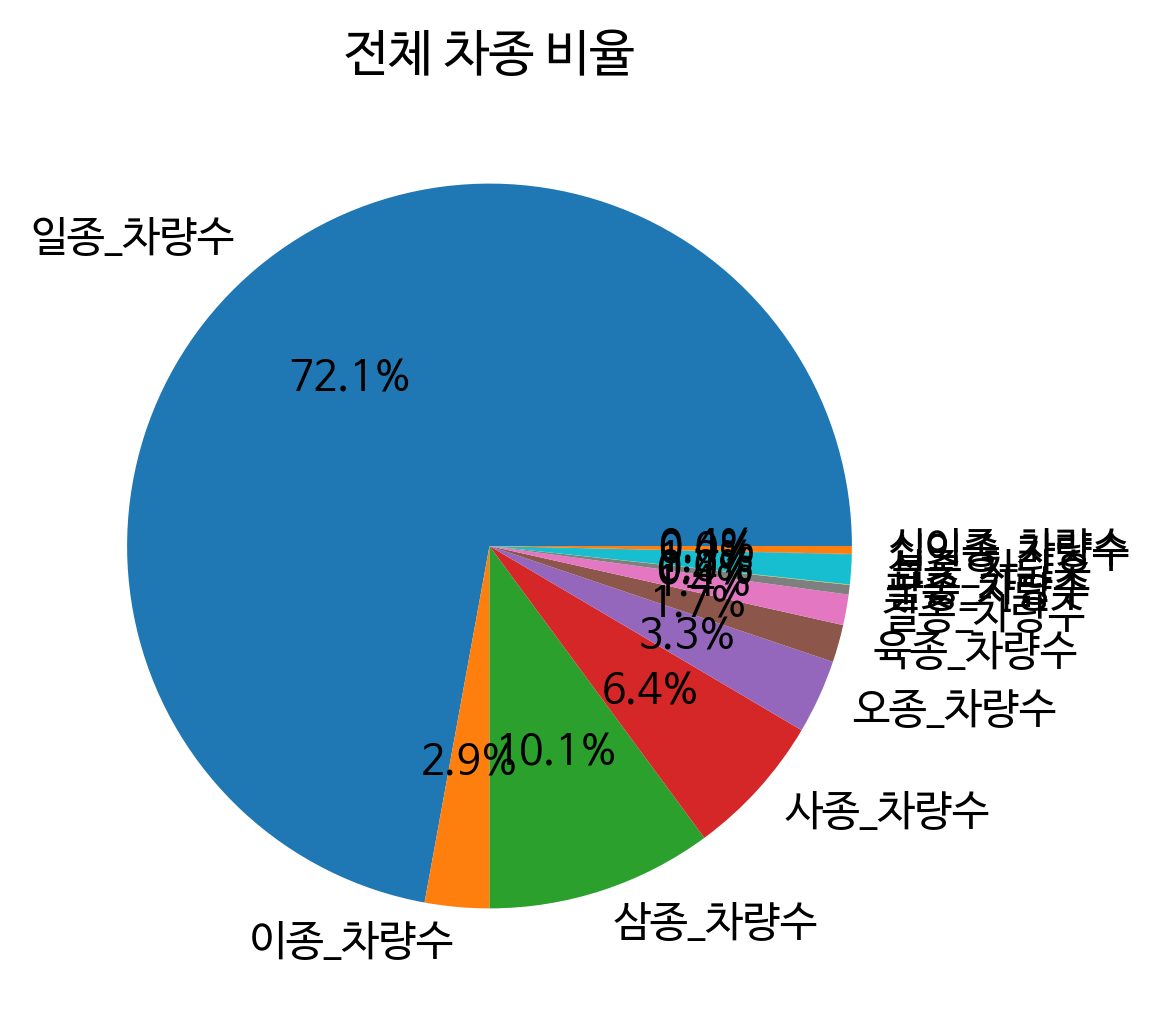

In [ ]:
plt.figure(dpi=150)
plt.title('전체 차종 비율')
plt.rc('font', family='NanumBarunGothic') 
plt.pie(car_total, labels=df.columns[6:18], autopct='%.1f%%')
plt.show()

In [ ]:
daecheon_car_type = [i for i in df_Daecheon.columns[6:18]] # column명은 전체데이터든지 대천IC만 담은 데이터프레임이든지 같기 때문에 car_type을 써도 된다
daecheon_car_total = [df_Daecheon[j].sum() for j in daecheon_car_type] # daecheon_car_type == car_type
print(type(df.columns[6:18])) # 이 타입이 index 타입으로 나와서 pie차트 그릴때 labels 속성에 사용하지 못할 줄 알았다
print(type(car_type))
print(car_type)
print(daecheon_car_type)
print(daecheon_car_total)

<class 'pandas.core.indexes.base.Index'>
<class 'list'>
['일종_차량수', '이종_차량수', '삼종_차량수', '사종_차량수', '오종_차량수', '육종_차량수', '칠종_차량수', '팔종_차량수', '구종_차량수', '십종_차량수', '십일종_차량수', '십이종_차량수']
['일종_차량수', '이종_차량수', '삼종_차량수', '사종_차량수', '오종_차량수', '육종_차량수', '칠종_차량수', '팔종_차량수', '구종_차량수', '십종_차량수', '십일종_차량수', '십이종_차량수']
[1576867.0, 53505.0, 137086.0, 111802.0, 82765.0, 48614.0, 53412.0, 12163.0, 237.0, 26714.0, 312.0, 7175.0]


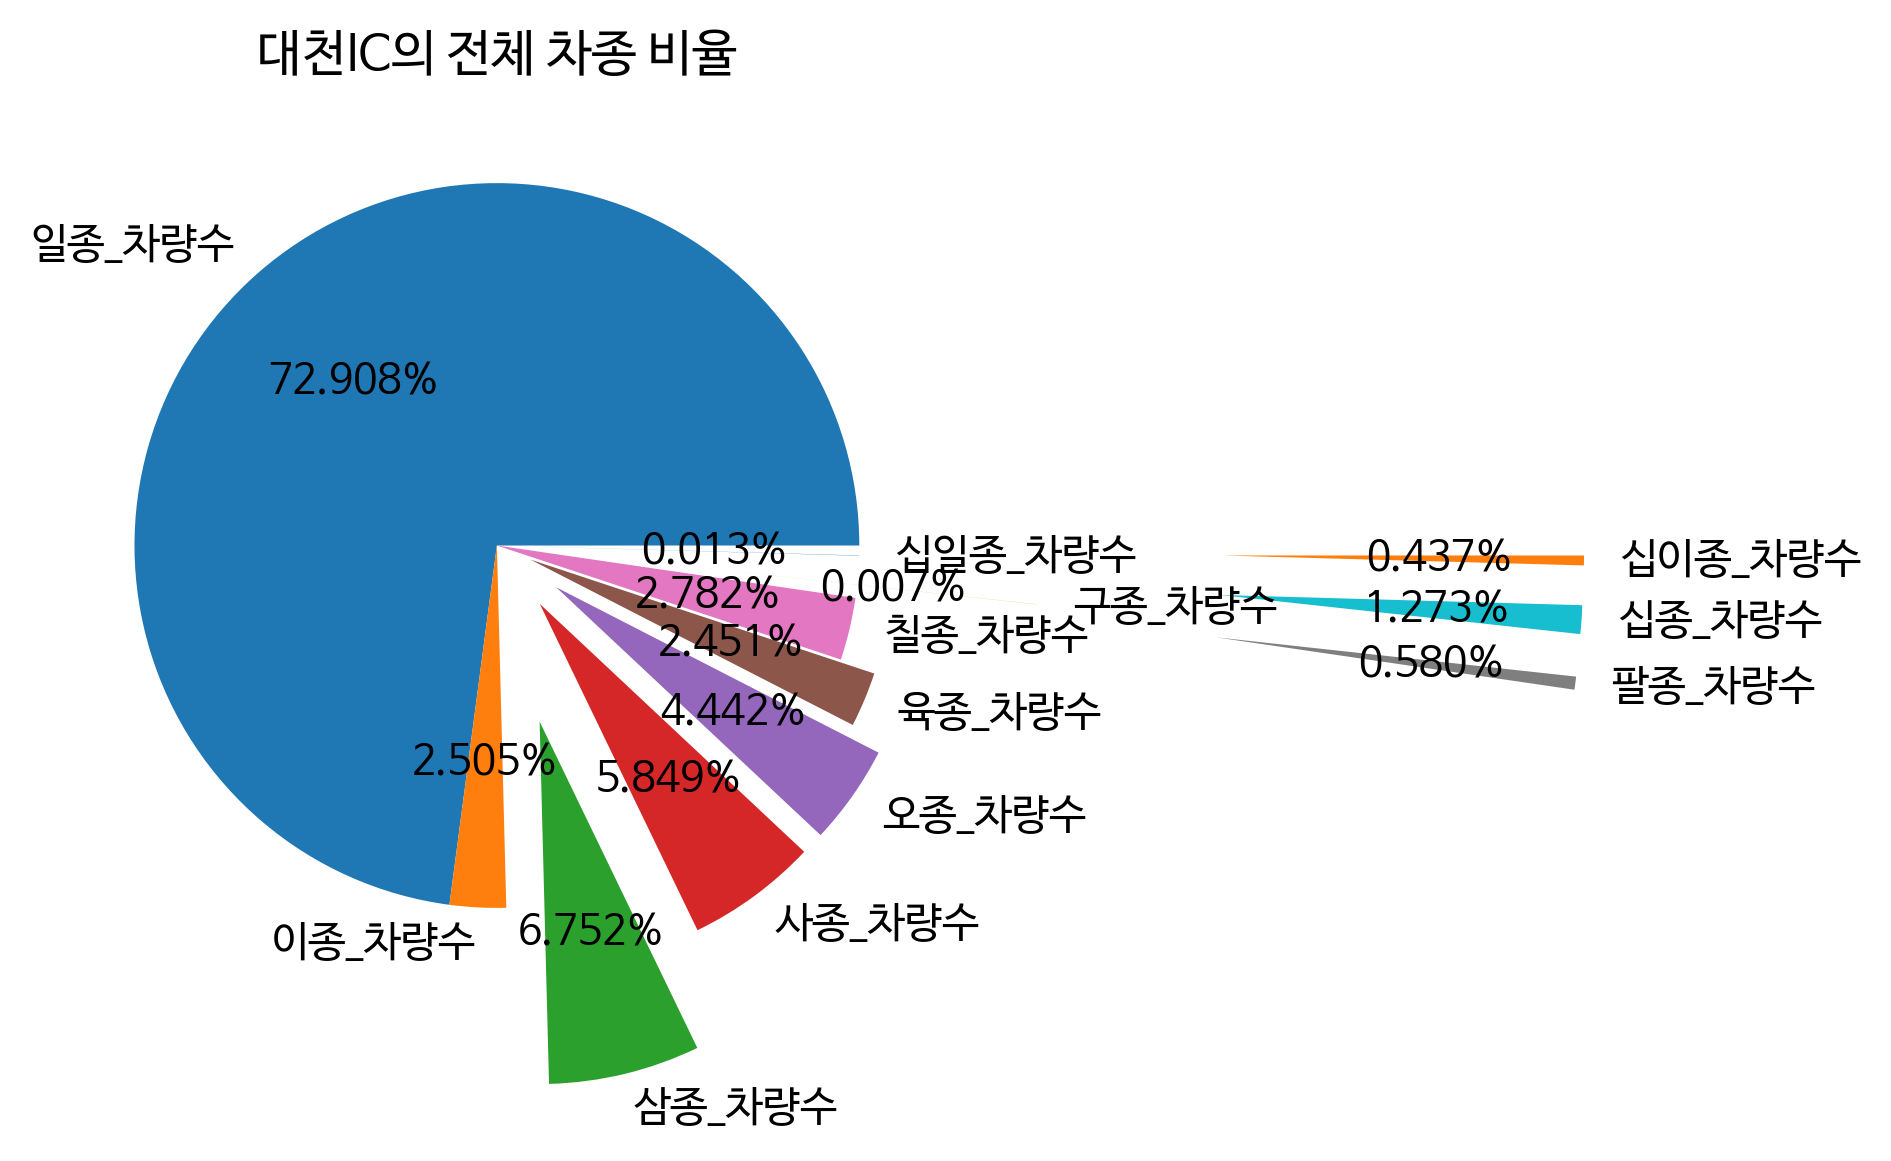

In [ ]:
# 대천IC의 전체 차종 비율 pie 차트
explode = [0, 0, 0.5, 0.2, 0.2, 0.1, 0, 2, 0.5, 2, 0, 2]

plt.figure(dpi=150)
plt.title('대천IC의 전체 차종 비율')
plt.rc('font', family='NanumBarunGothic') 
plt.pie(daecheon_car_total, labels=df.columns[6:18], autopct='%.3f%%', explode=explode) # labels에 굳이 column들을 리스트 내포로 만들지 않아도 된다
plt.show()

In [ ]:
daecheon_7_car_total = [df_Daecheon_7[j].sum() for j in car_type] # daecheon_car_type == car_type

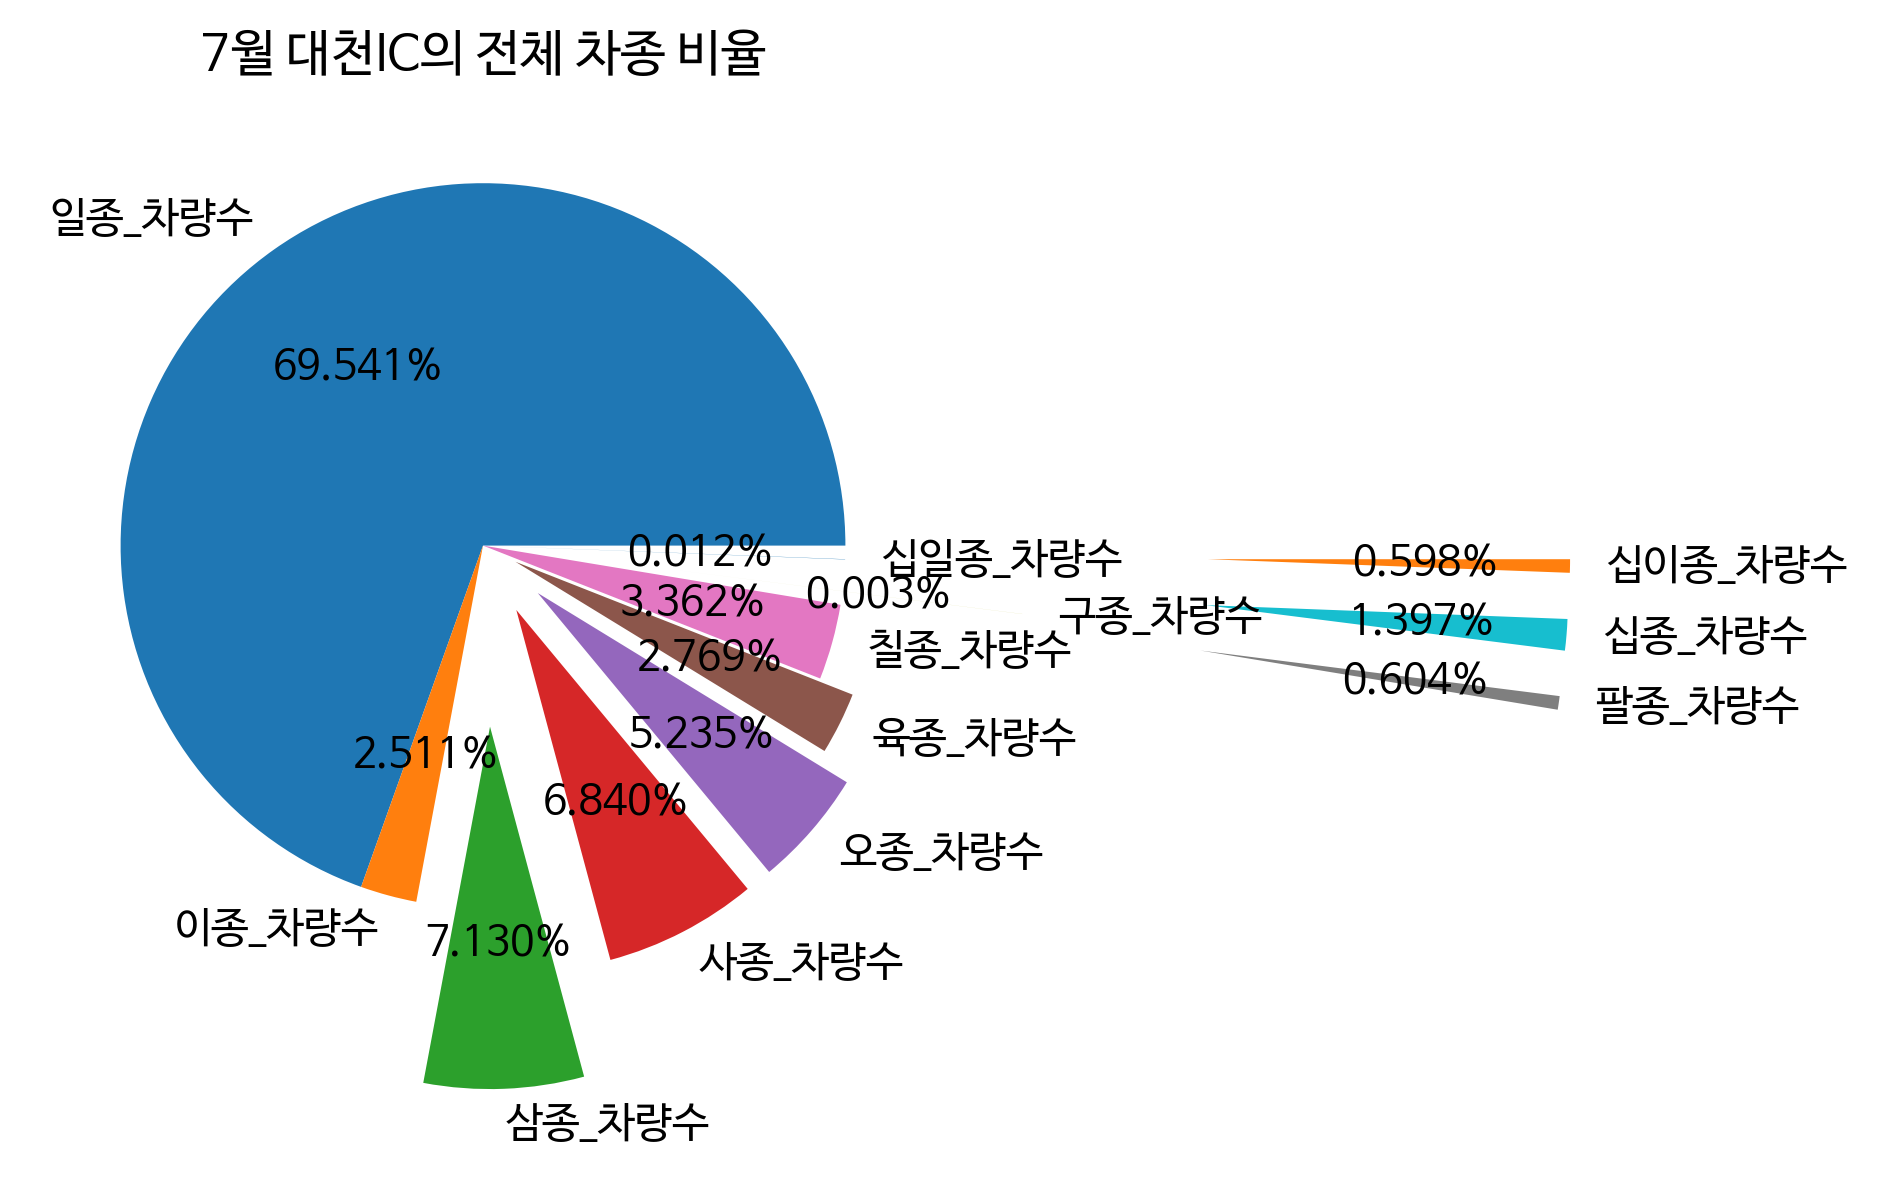

In [ ]:
# 7월 대천IC의 전체 차종 비율 pie 차트
explode = [0, 0, 0.5, 0.2, 0.2, 0.1, 0, 2, 0.5, 2, 0, 2]

plt.figure(dpi=150)
plt.title('7월 대천IC의 전체 차종 비율')
plt.rc('font', family='NanumBarunGothic') 
plt.pie(daecheon_7_car_total, labels=car_type, autopct='%.3f%%', explode=explode) # labels에 굳이 column들을 리스트 내포로 만들지 않아도 된다
plt.show()

In [ ]:
# 종료지점이 대천IC인 index값 찾기
result1 = []
for idx in range(len(df)) :
  if df.iloc[idx, 1] == ' 대천IC' :
    result1.append(idx)
len(result1)

443

In [ ]:
# 종료지점이 대천IC이고 7월인 index값 찾기
result2 = []
for idx in range(len(df)) :
  if df.iloc[idx, 1] == ' 대천IC' and df.iloc[idx, 3] == 7 :
    result2.append(idx)
len(result2)

36

In [ ]:
df_Daecheon.iloc[[0],[6,7,9]]

,일종_차량수,이종_차량수,사종_차량수
119266,7738,322,813


In [ ]:
df_Daecheon.iloc[[4],7:18:2]

,이종_차량수,사종_차량수,육종_차량수,팔종_차량수,십종_차량수,십이종_차량수
119270,362,158,64,15,30,3


In [ ]:
df_Daecheon[df_Daecheon.iloc[:, -1] == df_Daecheon.iloc[:5, -1].max()] # df_Daecheon.iloc[:5, -1].max() == max(df_Daecheon.iloc[:5, -1])

,도로_시작위치,도로_종료위치,년,월,일,방향,일종_차량수,이종_차량수,삼종_차량수,사종_차량수,오종_차량수,육종_차량수,칠종_차량수,팔종_차량수,구종_차량수,십종_차량수,십일종_차량수,십이종_차량수,전체_차량수
119269,무창포IC,대천IC,2016,1,4,1,15479,630,800,576,411,293,202,95,2,132,3,23,18646


In [ ]:
df[df['도로_종료위치'] == ' 대천IC'].sum(axis=0) # df_Daecheon.iloc[:,6:19].sum(axis)

도로_시작위치    무창포IC 무창포IC 무창포IC 무창포IC 무창포IC 무창포IC 무창포IC 무창포I...
도로_종료위치     대천IC 대천IC 대천IC 대천IC 대천IC 대천IC 대천IC 대천IC 대천IC ...
년                                                     893088
월                                                       2935
일                                                       6817
방향                                                       671
일종_차량수                                               4498756
이종_차량수                                                154581
삼종_차량수                                                416600
사종_차량수                                                360881
오종_차량수                                                274109
육종_차량수                                                151226
칠종_차량수                                                171680
팔종_차량수                                                 35818
구종_차량수                                                   442
십종_차량수                                                 78579
십일종_차량수                 

In [ ]:
df_Daecheon.iloc[:,6:19].sum(axis=0)

일종_차량수     4498756
이종_차량수      154581
삼종_차량수      416600
사종_차량수      360881
오종_차량수      274109
육종_차량수      151226
칠종_차량수      171680
팔종_차량수       35818
구종_차량수         442
십종_차량수       78579
십일종_차량수        778
십이종_차량수      26981
전체_차량수     6170431
dtype: int64